# CS342 Machine Learning

# Lab 6: The perceptron algorithm 

## Department of Computer Science, University of Warwick

## Sample solutions

## Please note: 

### 1. the code in this sample solution has not been optimized. This sample solution is for you to check the results you have obtained with your code.
### 2. the code assumes the needed files are located in your working directory.

This lab focuses on the implementation of the perceptron algorithm to classify linearly separable data.

The perceptron algorithm for linearly separable data covered in class is below:

|| **Algorithm 1: The perceptron** <br>|
|:--|:------|
|1:|Initialize $\textbf{w}$ to $\textbf{0}$<br>|
|2:|**while** non-zero error **do**<br>|
|3:|&emsp;**for** $i=1$ to $n$ (training examples) **do**<br>|
|4:|&emsp;&emsp;Get datapoint $\textbf{x}_i$<br>|
|5:|&emsp;&emsp;Compute error $e_i=\text{sign}(\textbf{w}^{\text{T}}\textbf{x}_i)-y_i$<br>|
|6:|&emsp;&emsp;**If** $e_i\neq0$<br>|
|7:|&emsp;&emsp;&emsp;Update $\textbf{w}+=y_i \textbf{x}_i$<br>|


Implement Algorithm 1 with the linearly separable data in Table 1. **Hints:**  You can use *numpy.sign(a)* to implement the sign(*a*) function. Recall to include the bias term in $\textbf{X}$ by adding a column of 1s.

| Feature 1 (${x}_{i1}$)| Feature 2 (${x}_{i2}$)   | Class ($y_i$)    |
|:-------------|:-----------|:------|
|1| -1   | -1   | 
|2| 1      | 1   |
|1.5| 0.5    | -1   |
|2| -1      | -1   |
|1| 2   | 1   |


1. Is the algorithm affected by different initialization on $\textbf{w}$? 
2. Plot the data and the resulting decision boundary when $\textbf{w}$ is initialized to 0

>>>>>>>>>>>>>>>>>>>>>>>>>>Training<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Initial soltion w_ =  [0. 0. 0.]
-----Training step 1 finished with total no. of errors =  5.0
-----Training step 2 finished with total no. of errors =  4.0
-----Training step 3 finished with total no. of errors =  3.0
-----Training step 4 finished with total no. of errors =  1.0
-----Training step 5 finished with total no. of errors =  4.0
-----Training step 6 finished with total no. of errors =  4.0
-----Training step 7 finished with total no. of errors =  3.0
-----Training step 8 finished with total no. of errors =  0.0
Finished checking refined solution. No. of errors =  0
>>>>>>>>>>>>>>>>>>>>>>>>>>Plot of the Decision Boundary<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
[-2.  -0.5  4.5]
Model: y =  -2.00 + -0.50x1 + 4.50x2 


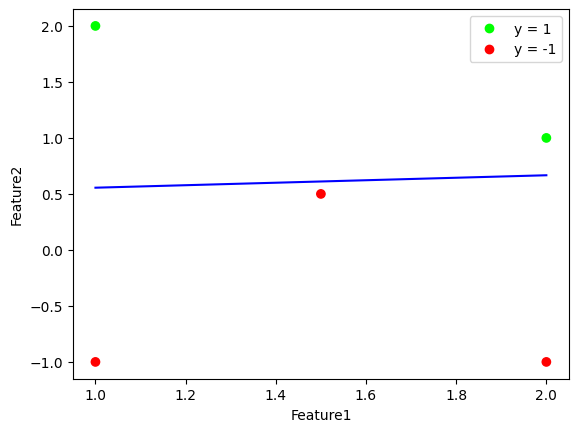

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Implement Algorithm 1 with the data in Table 1
def Perceptron(X, Y, w):
    errorFlag = 1
    step = 0
    while errorFlag:
        step += 1
        errSum = 0
        errorFlag = 0
        for i in range(X.shape[1]):
            x = X[:, i]
            #print(x)
            y = Y[i]
            e = y - np.sign(np.matmul(w, x))
            #print(np.sign(np.matmul(w, x)))
            #print(e)
            if e != 0:
                errorFlag = 1
                w = w + y * x
            errSum += np.abs(e)
        print('-----Training step ' + str(step) + ' finished with total no. of errors =  ' + str(errSum))
    return w

print('>>>>>>>>>>>>>>>>>>>>>>>>>>Training<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
X = np.array([[1, 1, 1, 1, 1],[1, 2, 1.5, 2, 1], [-1, 1, 0.5, -1, 2]])
Y = np.array([-1, 1, -1, -1, 1])
w_ = np.zeros(3)   # Use different initialization scheme here
print('Initial soltion w_ = ', w_)

# Run the algorithm
_w = Perceptron(X, Y, w_)

# Sanity check: use refined solution _w on all samples to confirm they are classified correctly
errSum = 0
for i in range(X.shape[1]):
    x = X[:, i]
    y = Y[i]
    e = y - np.sign(np.matmul(_w, x))
    if e != 0:
        errSum += np.abs(e)
print('Finished checking refined solution. No. of errors =  ' + str(errSum))

# Plot the data and the resulting decision boundary when w is initialized to 0

print('>>>>>>>>>>>>>>>>>>>>>>>>>>Plot of the Decision Boundary<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
w1 = _w[1]
w2 = _w[2]
bias = _w[0]
print("Model: y =  {:.2f} + {:.2f}x1 + {:.2f}x2 ".format(bias, w1, w2))

cVal= [0 if y == 1 else 1 for y in Y]
cName = ListedColormap(['lime', 'red'])
scatter = plt.scatter(X[1, :], X[2, :], c=cVal, cmap=cName)
plt.legend(handles=scatter.legend_elements()[0], labels=['y = 1', 'y = -1'])

line_f1 = np.linspace(1, 2, 1000)
line_f2 = -(w1 / w2) * line_f1 - bias / w2
plt.plot(line_f1, line_f2, c='blue')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.show()




